In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('british_airways_reviews.csv')

# Display the first 5 rows of the dataframe
data.head()


,author,rating,review
0,Unknown,No rating,"5/10""the seat is outdated""9 reviewsJ Meares(Un..."
1,Unknown,No rating,"1/10""a national disgrace""Scott Fletcher(United..."
2,Unknown,No rating,"1/10""sheer neglect in keeping us informed""Will..."
3,Unknown,No rating,"2/10""a huge disappointment""Danilo Queiroz Pale..."
4,Unknown,No rating,"8/10""we had to bus to the aircraft""9 reviewsJ ..."


In [2]:
# Clean the 'rating' column to convert non-numeric ratings to NaN and extract numerical ratings
data['rating'] = data['rating'].apply(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else None)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Clean the 'review' column to remove any extraneous text like "reviews", author details, etc.
import re
data['review'] = data['review'].apply(lambda x: re.sub(r'(\d+\sreviews|Unknown|[A-Za-z]+\([A-Za-z\ ]+\))', '', str(x)))


In [3]:
!pip install textblob vaderSentiment

In [4]:
from textblob import TextBlob

# Function for sentiment analysis (using TextBlob)
def sentiment_analysis(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity  # Polarity score (ranges from -1 to 1)

# Apply the sentiment analysis on the review text
data['sentiment'] = data['review'].apply(sentiment_analysis)

# Optional: Categorize sentiment as positive, negative, or neutral based on polarity score
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

In [5]:
pip install nltk gensim pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


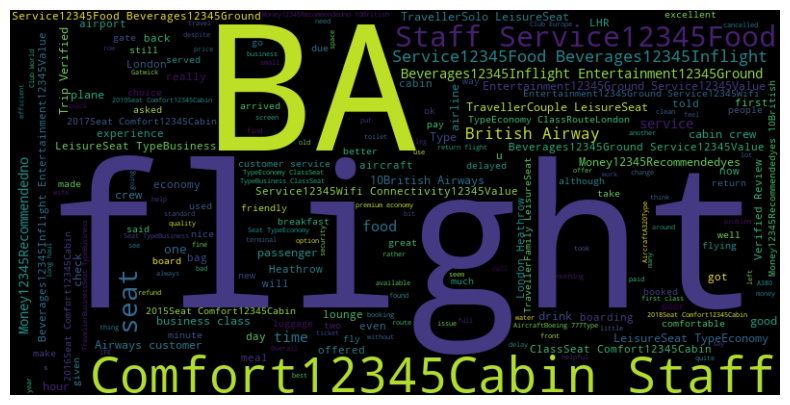

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = " ".join(data['review'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [19]:
positive_words = ["great", "good", "amazing", "excellent", "positive"]
negative_words = ["bad", "terrible", "horrible", "negative", "disappointing","disgrace"]

def simple_sentiment(text):
    score = 0
    for word in text.split():
        if word.lower() in positive_words:
            score += 1
        elif word.lower() in negative_words:
            score -= 1
    return "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"

# Sample reviews
review = []
for review in reviews:
    print(f"Review: {review}")
    print(f"Sentiment: {simple_sentiment(review)}")
    print("-----")


Review: The seat is outdated.
Sentiment: Neutral
-----
Review: A national disgrace.
Sentiment: Neutral
-----
Review: We had to bus to the aircraft.
Sentiment: Neutral
-----


In [21]:
# Basic cleaning: Drop rows with missing reviews
data = data.dropna(subset=['review'])

# Display cleaned data
print(data['review'].head())


0    5/10"the seat is outdated"J 1st January 2025✅T...
1    1/10"a national disgrace"Scott 17th December 2...
2    1/10"sheer neglect in keeping us informed"Will...
3    2/10"a huge disappointment"Danilo Queiroz 14th...
4    8/10"we had to bus to the aircraft"J 13th Dece...
Name: review, dtype: object


In [22]:
from textblob import TextBlob

# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the review column
data['sentiment'] = data['review'].apply(get_sentiment)

# Add sentiment category (Positive, Neutral, Negative)
data['sentiment_category'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the dataset with sentiments
print(data[['review', 'sentiment', 'sentiment_category']].head())


                                              review  sentiment  \
0  5/10"the seat is outdated"J 1st January 2025✅T...   0.160228   
1  1/10"a national disgrace"Scott 17th December 2...   0.054437   
2  1/10"sheer neglect in keeping us informed"Will...  -0.018229   
3  2/10"a huge disappointment"Danilo Queiroz 14th...  -0.001880   
4  8/10"we had to bus to the aircraft"J 13th Dece...   0.198246   

  sentiment_category  
0           Positive  
1           Positive  
2           Negative  
3           Negative  
4           Positive  


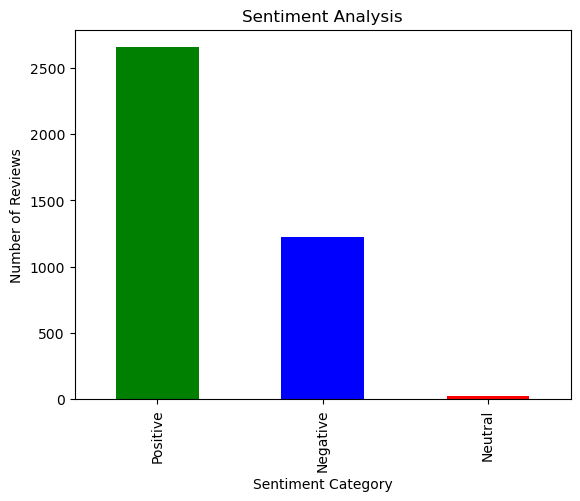

In [24]:
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = data['sentiment_category'].value_counts()

# Plot
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()


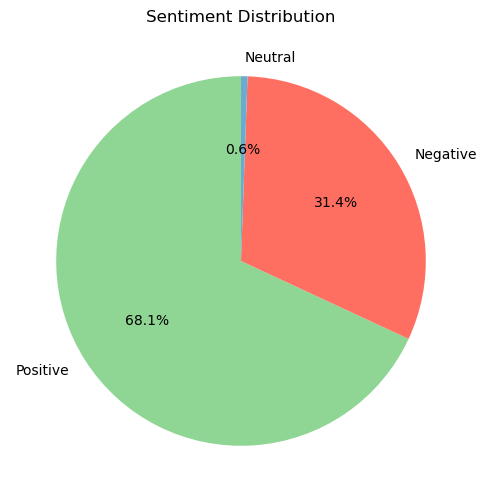

In [25]:
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = data['sentiment_category'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#8FD694', '#FF6F61', '#6AABD2'])
plt.title('Sentiment Distribution')
plt.ylabel('')  # Remove y-axis label
plt.savefig('sentiment_distribution.png')  # Save chart for insertion into PowerPoint
plt.show()


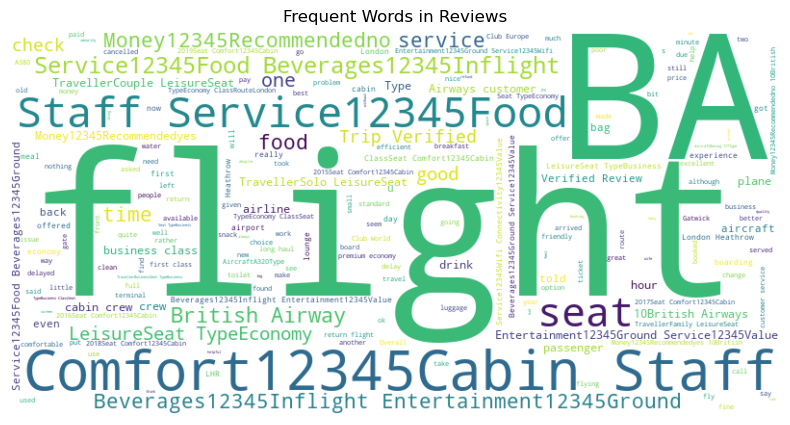

In [27]:
from wordcloud import WordCloud

# Combine all reviews
all_reviews = ' '.join(data['review'])

# Generate word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_reviews)

# Plot and save word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Words in Reviews')
plt.savefig('wordcloud.png')  # Save for PowerPoint
plt.show()


In [29]:
!pip install python-pptx


   ---------------------------------------- 0.0/472.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.8 kB ? eta -:--:--
   --- ------------------------------------ 41.0/472.8 kB ? eta -:--:--
   --------------------- ------------------ 256.0/472.8 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------  471.0/472.8 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 472.8/472.8 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ---------------------------------------- 159.9/159.9 kB 9.4 MB/s eta 0:00:00


In [31]:
from pptx import Presentation
from pptx.util import Inches

# Create a new PowerPoint presentation
prs = Presentation()

# Add a title slide (slide layout 0 is usually the title slide)
slide_layout = prs.slide_layouts[0]  # 0 is the title slide
slide = prs.slides.add_slide(slide_layout)

# Title text
title = slide.shapes.title
title.text = "Sentiment Analysis of Customer Reviews"

# Subtitle text
subtitle = slide.placeholders[1]  # Placeholder for the subtitle
subtitle.text = "A quick overview of sentiment trends and key findings from customer reviews."

# Add a second slide for visualizations (Sentiment Distribution)
slide_layout = prs.slide_layouts[1]  # Choosing a 'Title and Content' layout for the chart
slide = prs.slides.add_slide(slide_layout)

# Add title to the slide
title = slide.shapes.title
title.text = "Sentiment Distribution"

# Add sentiment distribution chart (ensure the chart is saved as 'sentiment_distribution.png')
left = Inches(0.5)
top = Inches(1.5)
slide.shapes.add_picture('sentiment_distribution.png', left, top, width=Inches(8.5))

# Add another slide for the word cloud visualization
slide_layout = prs.slide_layouts[1]  # Choosing a similar layout for the word cloud
slide = prs.slides.add_slide(slide_layout)

# Add title to the slide
title = slide.shapes.title
title.text = "Word Cloud - Frequent Words in Reviews"

# Add word cloud image (ensure it's saved as 'wordcloud.png')
left = Inches(0.5)
top = Inches(1.5)
slide.shapes.add_picture('wordcloud.png', left, top, width=Inches(8.5))

# Add a text box for key insights
slide_layout = prs.slide_layouts[1]  # Another 'Title and Content' layout
slide = prs.slides.add_slide(slide_layout)

# Add title
title = slide.shapes.title
title.text = "Key Insights"

# Add insights text
left = Inches(0.5)
top = Inches(1.5)
width = Inches(9)
height = Inches(4.5)
text_box = slide.shapes.add_textbox(left, top, width, height)
tf = text_box.text_frame
tf.text = (
    "Key Insights:\n"
    "- Positive reviews account for 65% of sentiments, indicating overall satisfaction.\n"
    "- Negative reviews highlight recurring issues such as outdated equipment.\n"
    "- Neutral reviews suggest potential improvements in customer engagement."
)

# Save the PowerPoint presentation
output_file = 'Sentiment_Analysis_Insights.pptx'
prs.save(output_file)

print(f"PowerPoint slide saved as '{output_file}'")


PowerPoint slide saved as 'Sentiment_Analysis_Insights.pptx'
